In [1]:
# Optimizing - minimizing or maximizing some function f(x) by altering x
# often expressed via minimizing f(x) as maximization can be done by minimization of -f(x)
# Function to be minimized/maximized: objective function / criterion / cost function / loss function / error function
# Value that minimizes or maximizes function f is denoted as x* = arg min f(x) where x is the argument that minimizes f

In [2]:
# Assume we have a function y = f(x) where x and y are real numbers
# Derivative of this function is denoted as f'(x) or as dy/dx
# This derivative gives slope of f(x) at point x - i.e. specifies how to scale small change in input to obtain change in output

# f(x + e) ~ f(x) + ef'(x)

# Useful in minimizing a function because it tells us how to change x to make small improvement in y
# I.e. we know that f(x - e sign(f'(x))) is less than f(x) for small enough e
# We can thus reduce f(x) by moving x in small steps with opposite sign of the derivative.
# This is gradient descent

In [3]:
# Lets define a univariate function J of theta J(0):
# Want to find value of theta that minimizes J(0)

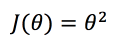
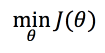

In [4]:
# To figure this out, we need to take a derivative of J(0) --> gives slope at point theta
# if slope positive --> value of theta needs to decrease to get closer to minimum
# if slope negative --> value of theta needs to increase to get closer to minimum
# if slop = 0 --> value of theta corresponds to minimum of the function J(0)
# Typically, we declare convergence if J(0) decreases less than 10^(-3) = 0.001 in 1 iteration

In [5]:
# To update value of theta on each iteration, we do:

# where: 
# # alpha = learning rate

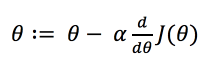

In [6]:
# Derivative of J(0) is:

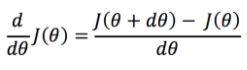

In [7]:
# When derivative f'(x) = 0, the derivative provides no information about which direction to move.
# Such points are known as critical points or stationary points.
# Local minimum is where f(x) is lower than all neighbouring points (left, right and in other directions)
# # Thus, no longer possible to decrease f(x) by making small steps in any direction
# # local maximum is where f(x) is higher than all neighbouring points
# # Some critical point are neither maximums or minimums - they're saddle points


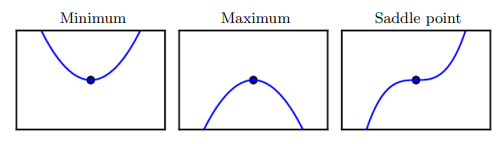

In [8]:
# The absolute lowest value of f(x) --> global minumum
# there can be more than 1 of those
# In deep learning, there can be many local minima that are not globally optimal
# there can be many flat or saddle point regions
# usually settle for f(x) that is very low but also not necessarily minimal in any formal sense

## 1-variable (Univariate) Gradient Descent

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
from pprint import pprint
import random as rand

In [10]:
def func_f_of_x(x):
    return (x + 5) ** 2

def gradient_of_f_of_x(f, x):
    delta = 1e-05
    x = x if (x > 0) or (x < 0) else delta
    f1 = f(x + (delta * x))
#     f2 = f(x - (delta * x))
    f2 = f(x)

    diff = f1 - f2
    denom = (delta * x)
    return diff / denom

In [11]:
def gradient_descent(max_iter, stop_thresh, x_init, obj_func, grad_func, lr=0.5, momentum=0.8):
    x_internal = x_init
    x_hist = x_internal
    f_hist = obj_func(x_internal)
    delta_x = np.zeros(x_internal.shape)
    i = 0
    diff = 1.0e10
    while i < max_iter and diff > stop_thresh:
        delta_x = -lr * grad_func(obj_func, x_internal) + momentum*delta_x
        x_internal = x_internal + delta_x
        x_hist = np.vstack((x_hist, x_internal))
        f_hist = np.vstack((f_hist, obj_func(x_internal)))
        i += 1
        diff = np.absolute(f_hist[-1] - f_hist[-2])
    return x_hist, f_hist

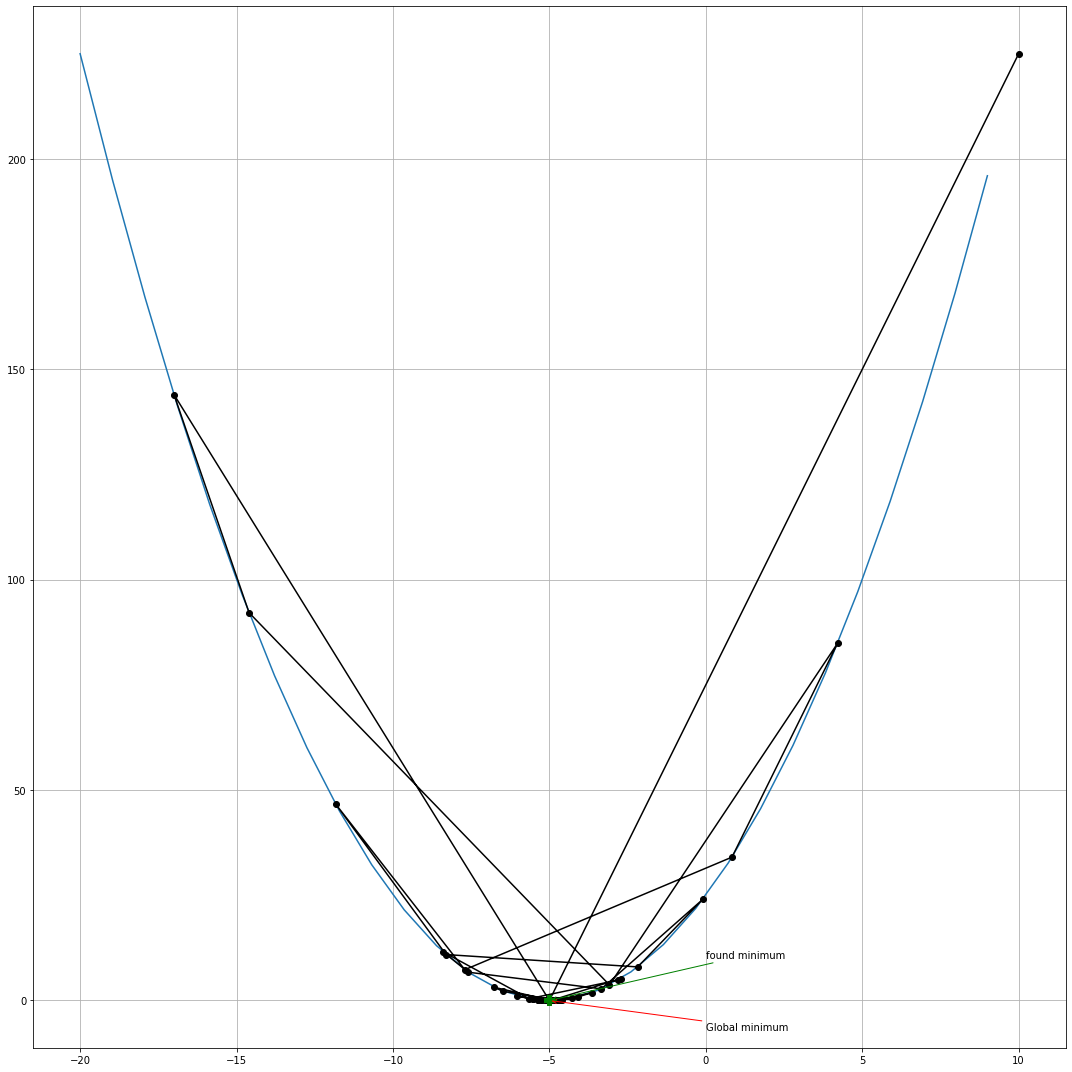

Found Minimum:  [-5.00005656] [3.1989003e-09]


In [12]:
x = np.linspace(-20, 9, 29)
y = np.vectorize(func_f_of_x)(x)
plt.figure(figsize=(15, 15))
plt.plot(x, y)
plt.plot(-5,0,marker='P',markersize=10,c="red")
plt.annotate("Global minimum", xy=[-5, 0], xytext=[0, -7], color="black", arrowprops=dict(arrowstyle="->", color = "red", connectionstyle='arc3'))

xz, fz = gradient_descent(100, -1, np.array([10]), func_f_of_x, gradient_of_f_of_x)
plt.plot(xz, fz, marker='o', c='black')

plt.plot(xz[-1], fz[-1], marker='P',markersize=10,c="green")
plt.annotate("found minimum", xy=[xz[-1], fz[-1]], xytext=[0, 10], color="black", arrowprops=dict(arrowstyle="->", color = "green", connectionstyle='arc3'))

plt.tight_layout()
plt.grid()
plt.show()

print("Found Minimum: ", xz[-1], fz[-1])

## 2-variable Gradient Descent with different momentums and learning rates

In [13]:
# For functions that take multiple inputs = use partial derivatives


In [14]:
# We want to see how the function changes given we let only 1 of many variables change, whilst keeping others constant

In [15]:
# in single variable derivatives, df/dx can be interpreted as a very tiny change of f(x) over very tiny change in x

In [16]:
# So... for multi-variable functions such as:

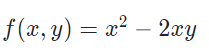

In [17]:
# We have 2 variables so we need 2 partial derivatives:

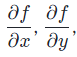

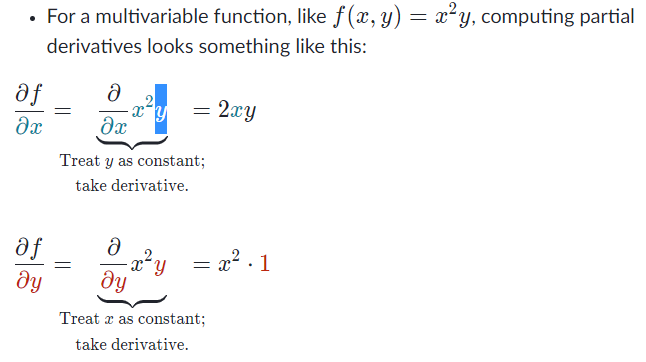

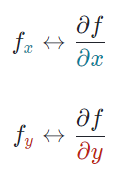

In [18]:
# Formally defining partial derivatives

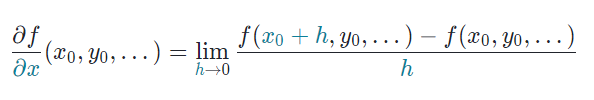
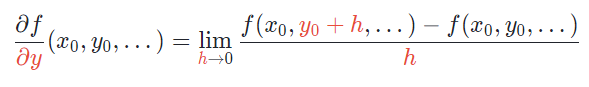

## Second Partial Derivatives

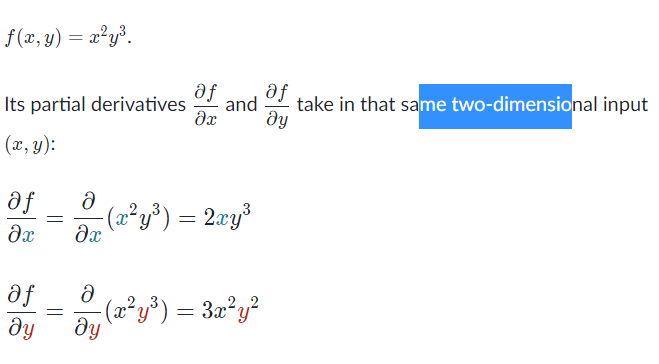

In [19]:
# Can take second derivatives of partial derivatives

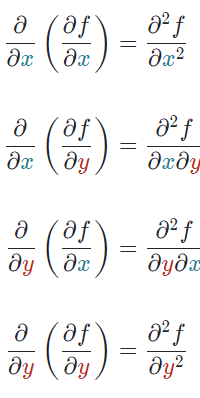
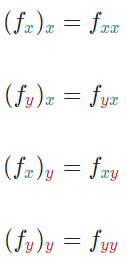

In [20]:
# Second partial derivatives are (usually) symmetric

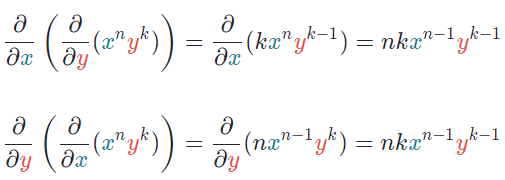

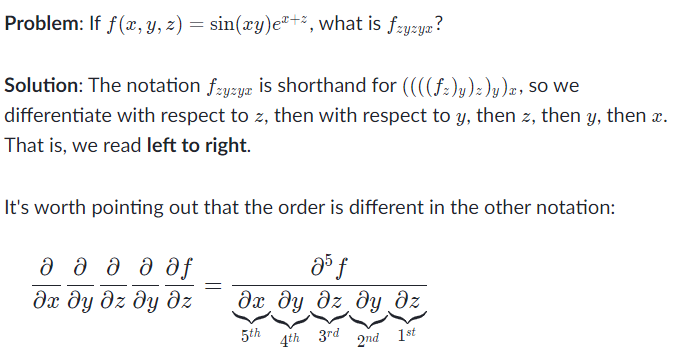

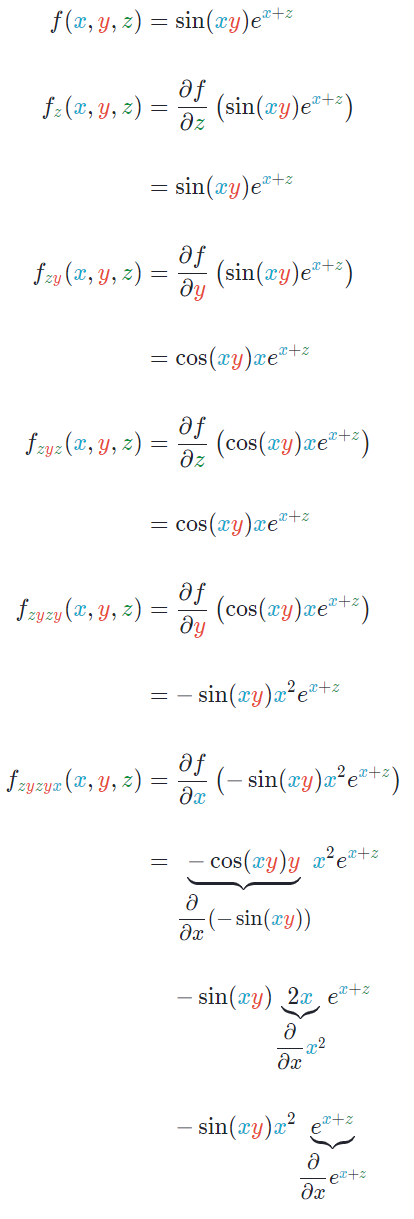

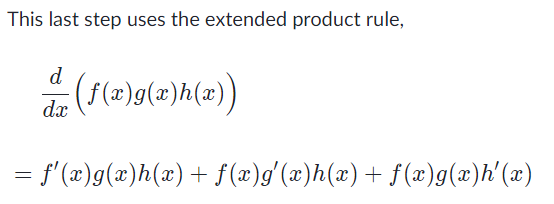

## Derivatives and Gradient of Vector valued functions

In [21]:
# Gradient of a function f() denoted as delta f, is the collection of all its partial derivatives into a vector

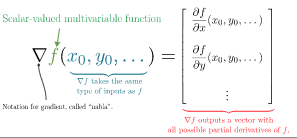

In [22]:
# this works for scalar-valued, multivariable functions --> functions with multidimensional input and 1D output

In [23]:
# I.e. for a function f(x, y) = x^2 - xy, the gradient (vector of all partial derivatives) is

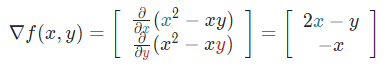

In [24]:
# The above works because derivative of f(x) = x is equal to 1

In [25]:
# Plotting the gradient of f(x, y) as a vector field:

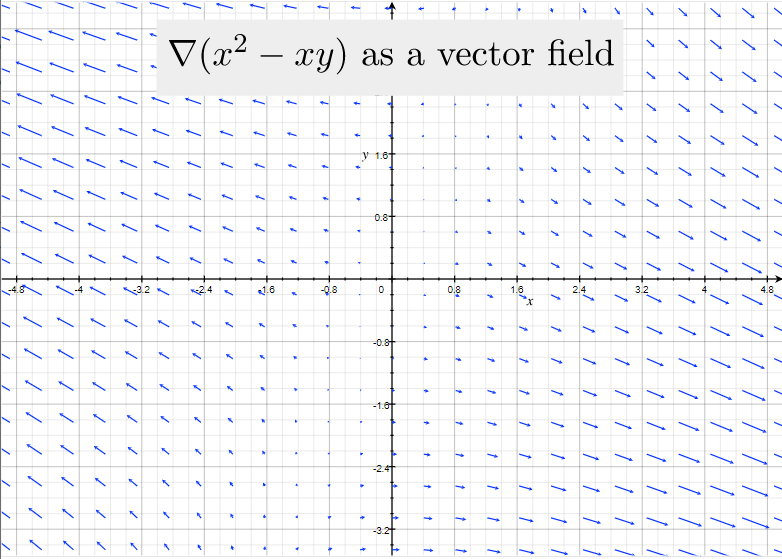

In [26]:
# So... each time we apply the gradient to a pair of x and y, it will produce a vector of partial derivatives
# What does this vector tell us about behaviour of the function around the point x,y?

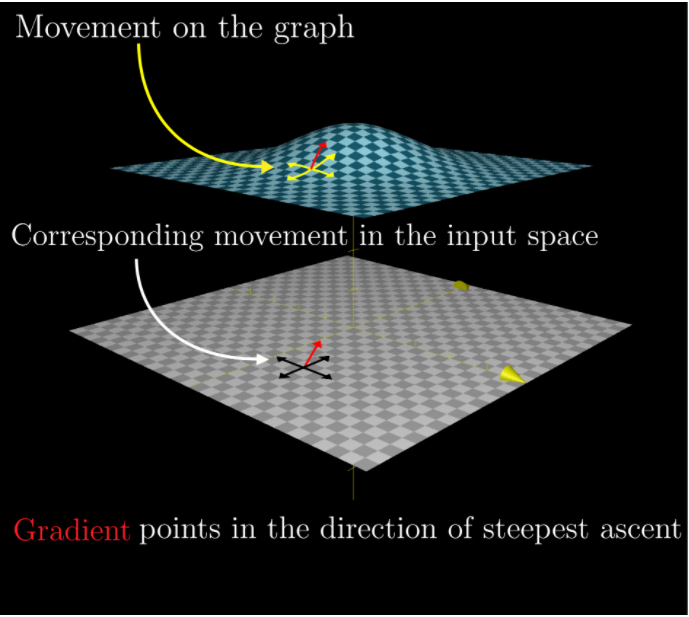

In [27]:
# Imagein you are standing on a hilly terain and that you're standing directly below or above the point (x, y).
# The slope of the hill will depend on which direction you chose to walk
# I.e. if you step straight in the +ve x direction, the slope is df/dx.
# I.e. if you step straight in the +ve y direction, the slope is df/dy
# Usually a combination of both

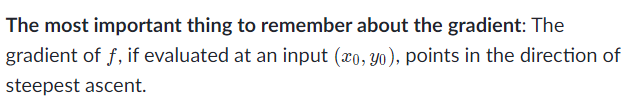

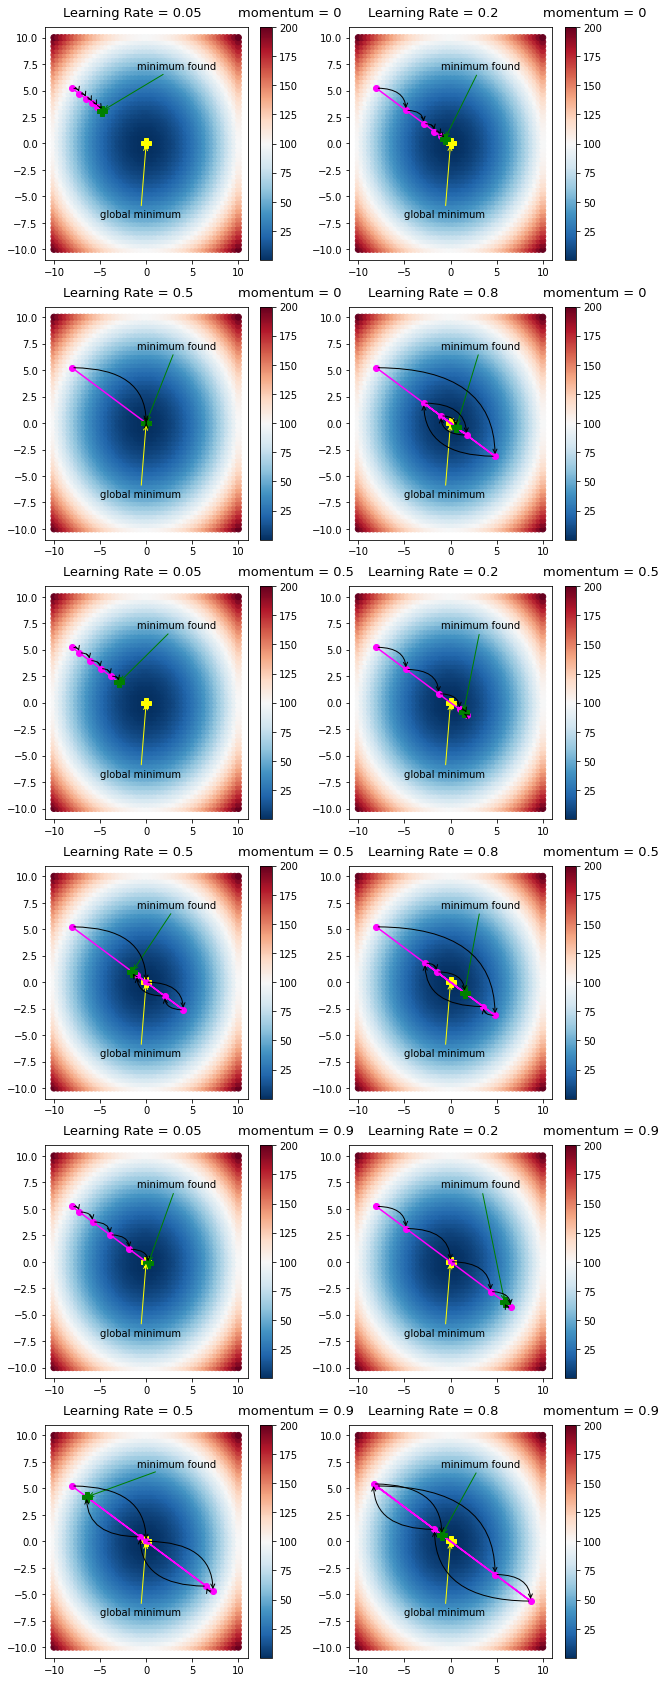

In [28]:
def func_g_of_x(x, axis=0):
    # function g(x) takes x as argument
    # x = vector[xi, yi]
    # g(x) = xi * xi + yi * yi
    return np.sum(x * x, axis=axis)

def gradient_of_g_of_x(g, x):
    arg = x[:]
    ret = np.array([])
    for i in range(len(x)):
        def wrap(val):
            arg[i] = val
            return g(arg, axis=0)
        grad = gradient_of_f_of_x(wrap, arg[i])
        ret = np.append(ret, grad)
    return ret

def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text, xy=xy, xytext=xytext, arrowprops=dict(arrowstyle="->", color = color, connectionstyle='arc3'))

def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1], c=f_val,vmin=min(f_val),vmax=max(f_val), cmap='RdBu_r')
    plt.colorbar(f_plot)
    annotate_pt('global minimum',(0,0),(-5,-7),'yellow')
    
def visualize_fw():
    xcoord = np.linspace(-10.0,10.0,50)
    ycoord = np.linspace(-10.0,10.0,50)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))
    pts = pts.transpose()
    f_vals = func_g_of_x(pts, axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts,f_vals

# create a big plot for different hyperparameters
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10, 30))

# reproducible random xi, xj of vector x
rand = np.random.RandomState(19)
x_init = rand.uniform(-10,10,2)

lrs = [0.05, 0.2, 0.5, 0.8]
momentums = [0, 0.5, 0.9]

idx = 1
for mom in momentums:
    for lr in lrs:
        plt.subplot(6, 2, idx)
        x_hist, f_hist = gradient_descent(5, -1, x_init, func_g_of_x, gradient_of_g_of_x, lr=lr, momentum=mom)
        xcoord = np.linspace(-10.0,10.0,50)
        ycoord = np.linspace(-10.0,10.0,50)
        w1,w2 = np.meshgrid(xcoord,ycoord)
        pts = np.vstack((w1.flatten(),w2.flatten()))
        pts = pts.transpose()
        f_vals = func_g_of_x(pts, axis=1)
        
        function_plot(pts, f_vals)
        
        plt.plot(x_hist[:,0],x_hist[:,1],marker='o',c='magenta') 
        annotate_pt('minimum found', (x_hist[-1,0], x_hist[-1,1]), (-1,7), 'green')
        
        _iter = x_hist.shape[0]
        for xi, i in zip(x_hist, range(_iter - 1)):
            plt.annotate("", xy=xi, xycoords='data', xytext=x_hist[i+1,:], textcoords='data', arrowprops=dict(arrowstyle='<-', connectionstyle='angle3'))
            
        plt.text(-9, 12,'Learning Rate = '+str(lr),fontsize=13)
        plt.text(10,12,'momentum = ' + str(mom),fontsize=13)
        idx += 1
